# Low Pass Filter, all in Java, with Graphics

First, set the classpath with the right jar. This `jar` contains the statistical functions, system resolution and other linear algebra features, as well as the graphic library we use to display the curves.

This jar is built from the root of this repository, using the following command:
```
$ ./gradlew shadowJar --parallel
```

In [1]:
%classpath add jar "../build/libs/Algebra-1.0-all.jar"

In [2]:
// Verify if the classpath above is taken in account
import gsg.SwingUtils.WhiteBoardPanel;
import gsg.VectorUtils;
import lowpass.Filter;

import javax.swing.*;
import java.awt.*;
import java.awt.event.ActionEvent;
import java.util.ArrayList;
import java.util.List;
import java.util.concurrent.atomic.AtomicReference;

In [3]:
String TITLE = "Low Pass Filter sample";

Where we are:

In [4]:
System.out.println(String.format("Running from folder %s", System.getProperty("user.dir")));
System.out.println(String.format("Java version %s", System.getProperty("java.version")));

Running from folder /Users/olivierlediouris/repos/raspberry-coffee/Algebra/jupyter
Java version 11.0.8


Now create a white board, with several non-default options

In [5]:
WhiteBoardPanel whiteBoard = new WhiteBoardPanel();
whiteBoard.setAxisColor(new Color(125, 0, 255, 255));
whiteBoard.setWithGrid(false);
whiteBoard.setBgColor(new Color(250, 250, 250, 255));
whiteBoard.setGraphicTitle(null);
whiteBoard.setSize(new Dimension(800, 600));
whiteBoard.setTextColor(Color.RED);
whiteBoard.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 32));
whiteBoard.setGraphicMargins(30);
whiteBoard.setXEqualsY(false);
// Enforce Y amplitude
whiteBoard.setForcedMinY(0d);
whiteBoard.setForcedMaxY(100d);

### Create random data
They are created as `List<Double>`, and will be eventually transformed into a `List<VectorUtils.Vector2D>`, to be easilly managed by the white board. This could be done all in one step, we proceed like this for clarity.

In [6]:
double START_FROM_Y = 50d;

double previousY = START_FROM_Y;   // Y starts here
double yAmpl = 100d;               // Y amplitude
List<Double> xs = new ArrayList<>();
List<Double> data = new ArrayList<>();
for (int i=0; i<1_000; i++) {
    xs.add((double)i);
    double delta = Math.random() - 0.5;  // [-0.5, 0.5]
    double nextY = previousY + (5d * delta);
    if (nextY > yAmpl || nextY < 0) {
        nextY = previousY - delta;
    }
    data.add(nextY);
    previousY = nextY;
}

### Apply Filter

In [7]:
// Filter
final List<Double> filteredValues = new ArrayList<>();
final AtomicReference<Double> acc = new AtomicReference<>(START_FROM_Y);
data.stream().forEach(value -> {
    acc.set(Filter.lowPass(Filter.ALPHA, value, acc.get()));
    filteredValues.add(acc.get());
});

### Prepare data for display

In [8]:
// Prepare data for display
double[] xData = xs.stream()
        .mapToDouble(Double::doubleValue)
        .toArray();
double[] yData = data.stream()
        .mapToDouble(Double::doubleValue)
        .toArray();
List<VectorUtils.Vector2D> dataVectors = new ArrayList<>();
for (int i=0; i<xData.length; i++) {
    dataVectors.add(new VectorUtils.Vector2D(xData[i], yData[i]));
}

double[] filteredY = filteredValues.stream()
        .mapToDouble(Double::doubleValue)
        .toArray();
List<VectorUtils.Vector2D> filteredDataVectors = new ArrayList<>();
for (int i=0; i<xData.length; i++) {
    filteredDataVectors.add(new VectorUtils.Vector2D(xData[i], filteredY[i]));
}

whiteBoard.setAxisColor(Color.BLACK);
whiteBoard.resetAllData();


### Set data as series to the WhiteBoard, and display.

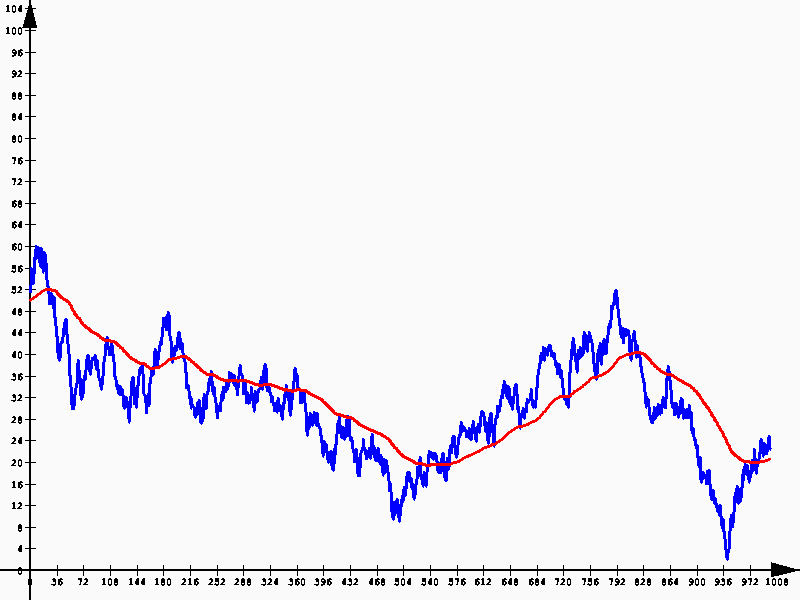

In [9]:
// Raw series
WhiteBoardPanel.DataSerie dataSerie = new WhiteBoardPanel.DataSerie()
        .data(dataVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoard.addSerie(dataSerie);
// Filtered series
WhiteBoardPanel.DataSerie filteredDataSerie = new WhiteBoardPanel.DataSerie()
        .data(filteredDataVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.RED);
whiteBoard.addSerie(filteredDataSerie);

// And this is the display
whiteBoard.getImage();

---